# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. Yyou can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd

root_dir = './' # this is to be defined by you 
local_path = 'Data for regession tasks/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'
# print(training_data_path)

./Data for regession tasks/


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict.Plot histograms of all features to visualise their distributions and identify outliers.Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code.Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations.Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

# **Sample Answer to Exercise 1**

In [2]:
df = pd.read_csv(training_data_path)
df_targets = pd.read_csv(training_targets_path)

In [3]:
# for Training_data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

**Comment:**
We noticed that among all the features, only three features have missing values, namely PctSomeCol18_24 (609), PctEmployed16_Over (2319), and PctPrivateCoverageAlone (1955).

In [4]:
# For Training_data_targets:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TARGET_deathRate  2438 non-null   float64
dtypes: float64(1)
memory usage: 19.2 KB


array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>],
       [<AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>],
       [<AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctSomeCol18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_O

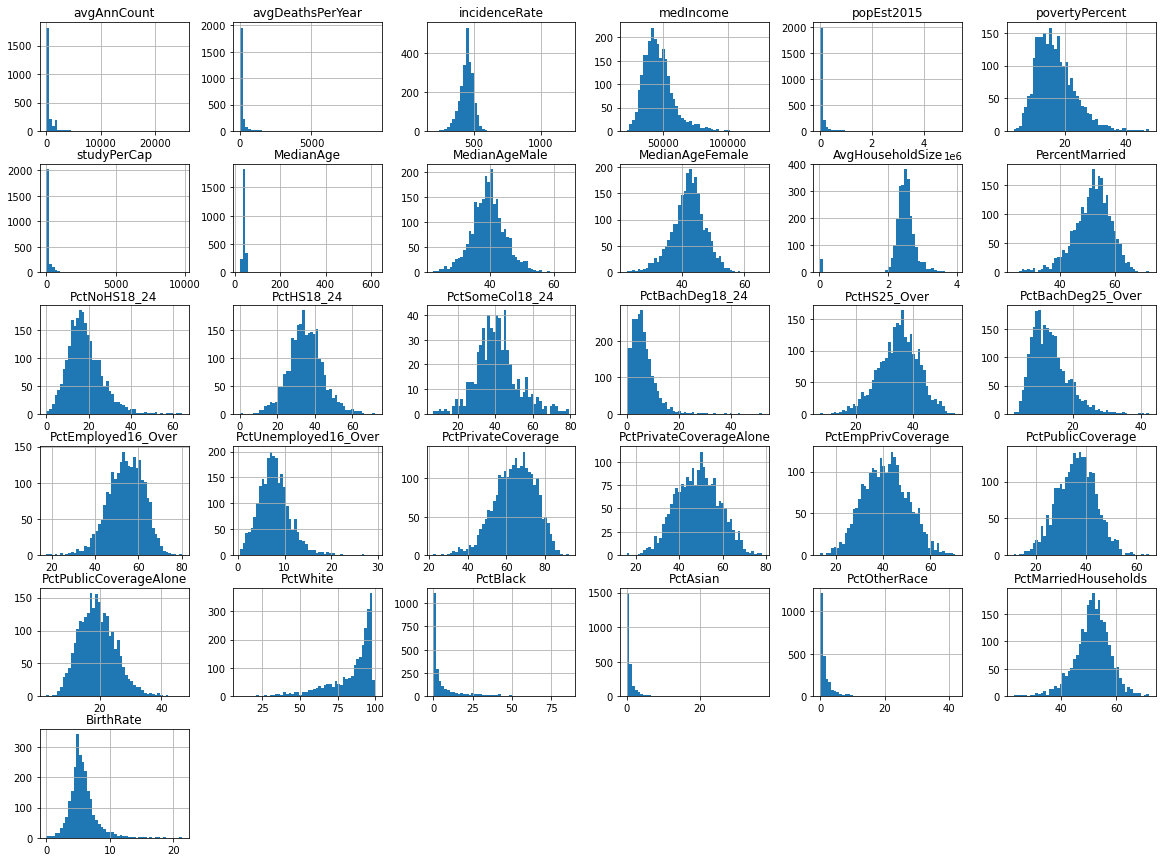

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(20,15))

**Comment:**
At the same time, we noticed that AvgHouseholdSize is basically between 2-3, but there are also a few around 0.


array([[<AxesSubplot:title={'center':'TARGET_deathRate'}>]], dtype=object)

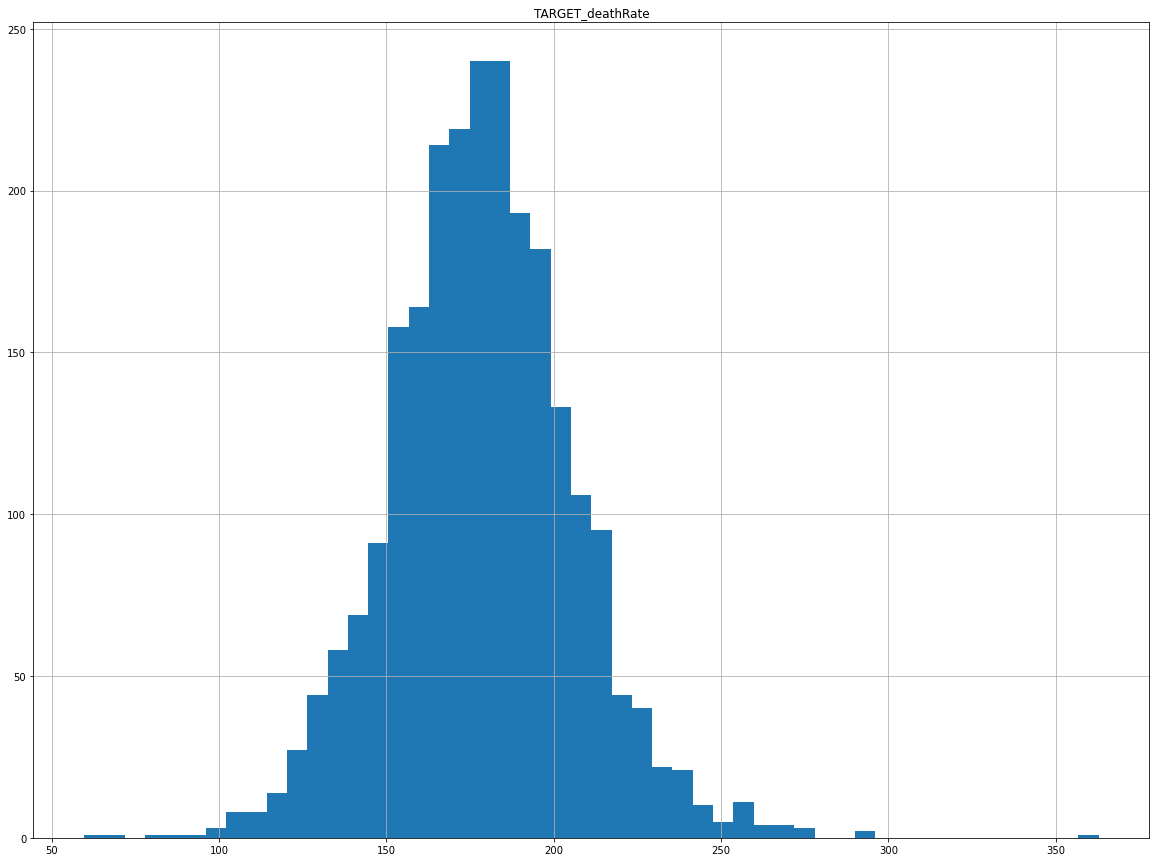

In [6]:
df_targets.hist(bins=50,figsize=(20,15))

**Comment:**
We noticed that the data is basically concentrated between 50-300, but there are also a small amount of data greater than 350.

In [7]:
# Compute correlation matrix
corr_matrix = df.corrwith(df_targets['TARGET_deathRate']).abs()

# Sort correlations in descending order
sorted_corr = corr_matrix.sort_values(ascending=False)
sorted_corr

PctBachDeg25_Over          0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                  0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over         0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage         0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone    0.355050
PctMarriedHouseholds       0.290645
PctBachDeg18_24            0.284566
PctHS18_24                 0.266285
PercentMarried             0.266153
PctEmpPrivCoverage         0.259006
PctBlack                   0.236380
PctSomeCol18_24            0.186140
PctOtherRace               0.182602
PctAsian                   0.181948
PctWhite                   0.174521
avgAnnCount                0.150019
popEst2015                 0.130122
avgDeathsPerYear           0.094048
PctNoHS18_24               0.090565
BirthRate                  0.088543
AvgHouseholdSize           0.045545
MedianAgeMale              0

**Comment:**
So the top five features with strongest correlations to the targets are:
 ‘PctBachDeg25_Over’, ‘incidenceRate’, ‘PctPublicCoverageAlone’, ’medIncome’and ’povertyPercent’

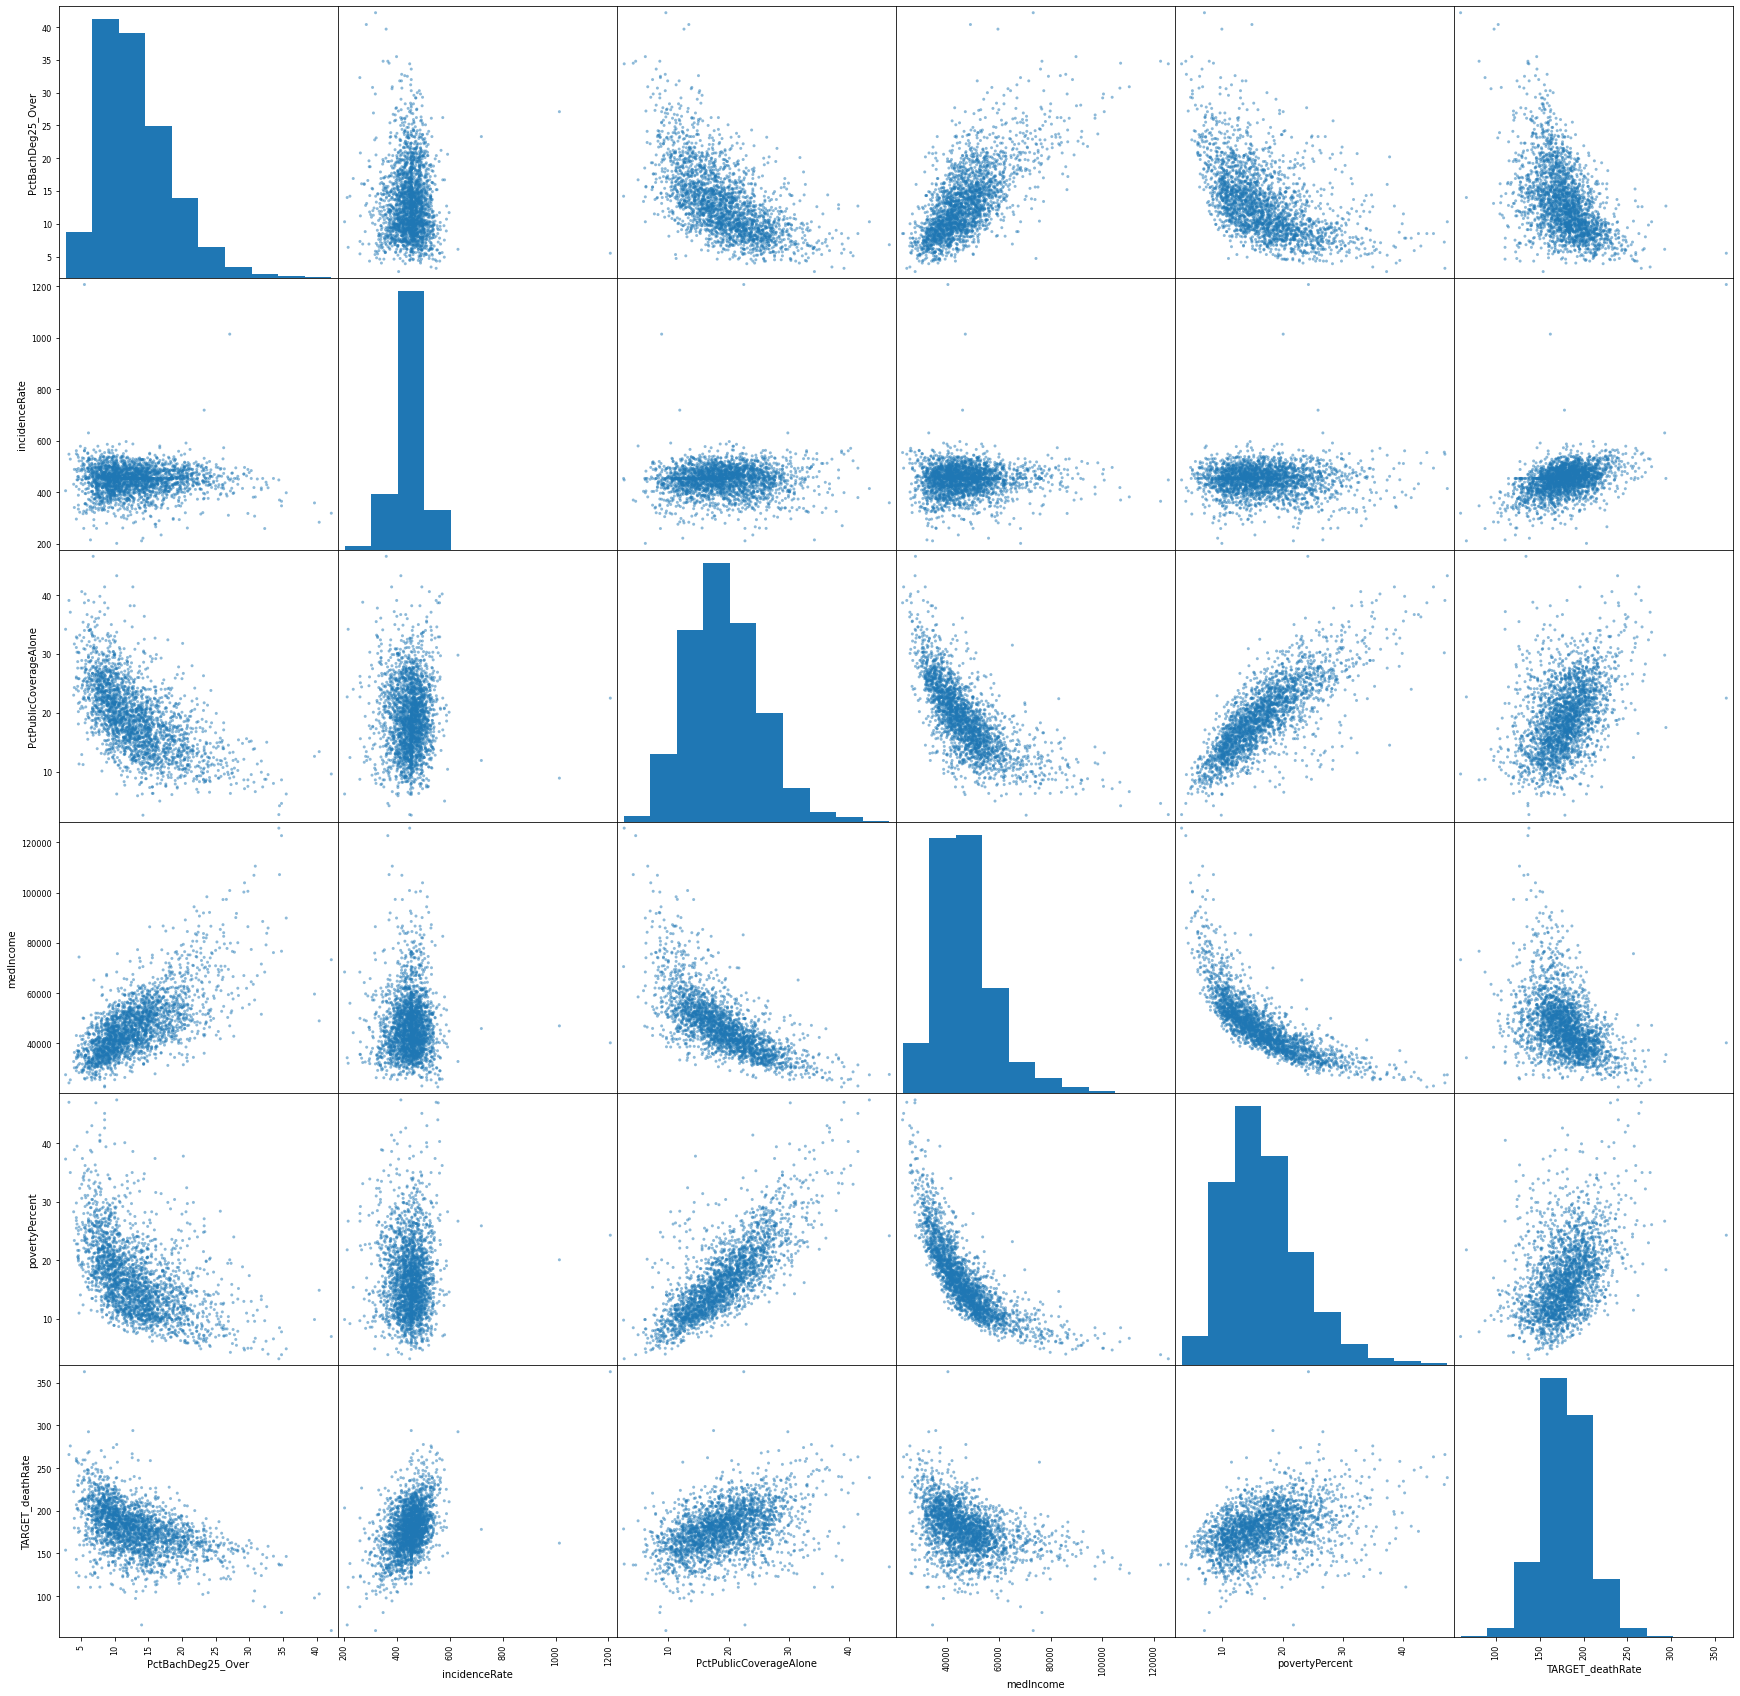

In [8]:
from pandas.plotting import scatter_matrix
# Plot these correlations using the scatter matrix plotting function available in pandas
attributes = ["PctBachDeg25_Over", "incidenceRate", "PctPublicCoverageAlone","medIncome", "povertyPercent"]
# scatter_matrix(df[attributes], figsize=(12, 8))

# create a scatter matrix of the top 5 features and target
pd.plotting.scatter_matrix(df[attributes].join(df_targets), figsize=(30, 30))
# show the plot
plt.show()

**Comment:**
Here, we compared the relationship between the five variables and their relationship with the target, and found that there is an obvious linear relationship between 'medIncome' and 'PctBachDeg25_Over' in the scatter matrix, which proves that these two features are highly Related. With the increasing of 'PctBachDeg25_Over', the 'medIncome' also increase. In the same way, there is also an obvious linear relationship between 'PctPublicCoverageAlone' and 'povertyPercent', which proves that these two features are also related.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

# **Sample Answer to Exercise 2**

In [9]:
# As there is only one numerical attribute, we can use the SimpleImputer class to fill in the missing values, and use the StandardScaler,MinMaxScaler class to scale the data.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Identify your numerical columns
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Create a numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # fill missing values with mean
    ('std_scaler', StandardScaler()), # standardize features by removing the mean and scaling to unit variance
])

# Create a ColumnTransformer and add the numerical pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features)
])

# Apply the ColumnTransformer to the DataFrame
df_preprocessed = preprocessor.fit_transform(df)
training_preprocessed = pd.DataFrame(df_preprocessed,columns=df.columns)
training_preprocessed.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,-0.418600,-0.336843,-0.792910,-1.106563,-0.321391,0.576024,-0.29103,0.121701,2.122302,1.822380,...,0.016283,-1.609446,1.751848,0.235270,0.795452,-0.596862,-0.449266,-0.487014,0.097040,-0.298950
1,-0.375912,-0.312739,-0.802008,0.024206,-0.271554,-0.479177,-0.29103,-0.103374,0.038539,0.100185,...,0.898725,0.593965,-0.600865,-1.033286,0.528141,-0.481019,-0.245376,-0.316471,-0.052515,0.348572
2,-0.438780,-0.378479,-1.744511,2.546139,-0.315708,-1.581626,-0.29103,-0.161250,-0.510816,-0.442680,...,1.892868,1.388463,-2.342652,-1.767712,0.734930,-0.627355,-0.278579,-0.530235,2.027370,-0.245321
3,-0.267252,-0.183451,-0.332575,2.835673,-0.181191,-1.471381,-0.29103,-0.045498,0.587895,0.362259,...,1.758826,1.526177,-0.964820,-0.949828,0.364385,-0.111874,-0.144458,-0.436916,1.692375,-0.004386
4,-0.406182,-0.332461,-0.734686,-0.357897,-0.273096,-0.353183,-0.29103,-0.311300,-1.780017,-1.977680,...,0.250856,0.562185,-1.224788,-0.182018,-0.245879,-0.422155,2.802006,1.020883,1.793664,2.412845


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


# **Sample Answer to Exercise 3**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, df_targets, test_size=0.2, random_state=42)

# Define the regularization weights to try
alpha_values = np.linspace(0.001, 0.1, 100).round(3).tolist()
print('We then set regularization weights as ',alpha_values,' Then use them to train the OLS model and Lasso model.')

We then set regularization weights as  [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1]  Then use them to train the OLS model and Lasso model.


In [11]:
print('Start train the OLS model:' )
# Fit and evaluate OLS model
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_preds = ols.predict(X_test)
ols_mse = mean_squared_error(y_test, ols_preds)
ols_rmse = np.sqrt(ols_mse)
print('The MSE of OLS model is ',ols_mse,' and the RMSE of OLS model is ',ols_rmse,'.\n')
print('Show some predictions and labels of OLS model')
some_data=df.iloc[:5]
some_labels=df_targets.iloc[:5]
some_data_prepared=preprocessor.transform(some_data)
print("Predictions:", ols.predict(some_data_prepared))
print("Labels:", list(some_labels['TARGET_deathRate']))

Start train the OLS model:
The MSE of OLS model is  349.802088888997  and the RMSE of OLS model is  18.702996788990713 .

Show some predictions and labels of OLS model
Predictions: [[178.75893009]
 [151.47264965]
 [143.36852289]
 [146.65280687]
 [165.0054689 ]]
Labels: [199.5, 137.1, 126.9, 173.8, 179.8]


Start train Lasso model with different alpha values


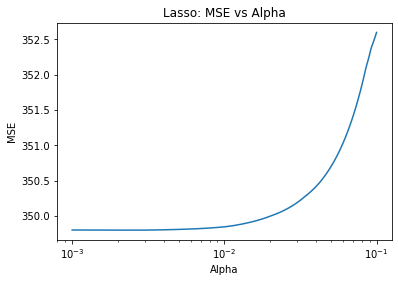

The best alpha value for Lasso is  0.002
The MSE of Lasso model is  349.7977751904057  and the RMSE of Lasso model is  18.70288146758156 

Show some predictions and labels of Lasso model
Predictions: [178.80697942 151.51928118 143.32201396 146.66751144 165.03244395]
Labels: [199.5, 137.1, 126.9, 173.8, 179.8]


In [12]:
print('Start train Lasso model with different alpha values' )
# Fit and evaluate Lasso model with different alpha values
lasso_mses = []
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_preds = lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_preds)
    lasso_mses.append(lasso_mse)
# print('The MSEs of Lasso model with different alpha values ',lasso_mses)

# Plot MSE vs alpha for Lasso
plt.plot(alpha_values, lasso_mses)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Lasso: MSE vs Alpha')
plt.show()

best_lasso_alpha = alpha_values[np.argmin(lasso_mses)]
print('The best alpha value for Lasso is ',best_lasso_alpha)
lasso_best = Lasso(alpha=best_lasso_alpha)
lasso_best.fit(X_train, y_train)
lasso_preds = lasso_best.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse= np.sqrt(lasso_mse)
print('The MSE of Lasso model is ',lasso_mse,' and the RMSE of Lasso model is ',lasso_rmse,'\n')
print('Show some predictions and labels of Lasso model')
some_data=df.iloc[:5]
some_labels=df_targets.iloc[:5]
some_data_prepared=preprocessor.transform(some_data)
print("Predictions:", lasso_best.predict(some_data_prepared))
print("Labels:", list(some_labels['TARGET_deathRate']))

Start train the MSE of Ridge model with different alpha values


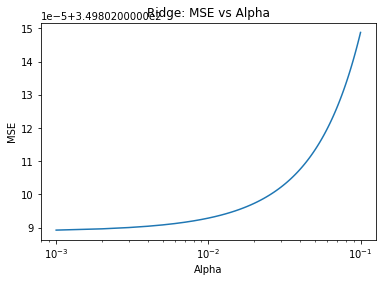

The best alpha value for Ridge is  0.001
The MSE of Ridge model is  349.8020892686981  and the RMSE of Ridge model is  18.702996799141523 

Show some predictions and labels of Ridge model
Predictions: [[178.75894767]
 [151.47271087]
 [143.36848501]
 [146.65285082]
 [165.00546216]]
Labels: [199.5, 137.1, 126.9, 173.8, 179.8]


In [13]:
print('Start train the MSE of Ridge model with different alpha values' )
# Fit and evaluate Ridge model with different alpha values
ridge_mses = []
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_preds = ridge.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_preds)
    ridge_mses.append(ridge_mse)
# print('The MSEs of Ridge model with different alpha values ',ridge_mses)

# Plot MSE vs alpha for Ridge
plt.plot(alpha_values, ridge_mses)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge: MSE vs Alpha')
plt.show()

best_ridge_alpha = alpha_values[np.argmin(ridge_mses)]
print('The best alpha value for Ridge is ',best_ridge_alpha)
ridge_best = Ridge(alpha=best_ridge_alpha)
ridge_best.fit(X_train, y_train)
ridge_preds = ridge_best.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse= np.sqrt(ridge_mse)
print('The MSE of Ridge model is ',ridge_mse,' and the RMSE of Ridge model is ',ridge_rmse,'\n')
print('Show some predictions and labels of Ridge model')
some_data=df.iloc[:5]
some_labels=df_targets.iloc[:5]
some_data_prepared=preprocessor.transform(some_data)
print("Predictions:", ridge_best.predict(some_data_prepared))
print("Labels:", list(some_labels['TARGET_deathRate']))

**Comment:**
Then no clear whther the models are overfitting,let’s do the cross validate for all to help with quantitatively comparing results from all three models and report the best performing one.

In [14]:
# Quantitatively compare your results from all three models and report the best performing one
from sklearn.model_selection import cross_val_score

# score for OLS
ols_scores =cross_val_score(ols, df_preprocessed,df_targets,scoring="neg_mean_squared_error",cv=10)
ols_rmse_scores = np.sqrt(-ols_scores)
# score for Lasso
lasso_scores =cross_val_score(lasso_best, df_preprocessed,df_targets,scoring="neg_mean_squared_error",cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
# score for Ridge
ridge_scores =cross_val_score(ridge_best, df_preprocessed,df_targets,scoring="neg_mean_squared_error",cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)

def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std(),'.\n')
    return scores,scores.mean(),scores.std()
print('The cross validation scores for OLS model are:')
ols_score,ols_mean,ols_std=display_scores(ols_rmse_scores)
print('The cross validation scores for Lasso model are:')
lasso_score,lasso_mean,lasso_std=display_scores(lasso_rmse_scores)
print('The cross validation scores for Ridge model are:')
ridge_score,ridge_mean,ridge_std=display_scores(ridge_rmse_scores)

# Choose the best performing model
if ols_mean < lasso_mean and ols_mean < ridge_mean:
    best_model = ols
    print("Best Model: OLS")
elif lasso_mean < ridge_mean:
    best_model = lasso_best
    print("Best Model: Lasso")
else:
    best_model = ridge_best
    print("Best Model: Ridge")

The cross validation scores for OLS model are:
Scores: [19.18747072 20.74175689 19.84153974 18.44817179 18.70299545 19.31204314
 19.14546821 20.52052752 17.15326991 19.89205579]
Mean: 19.294529916376923
Standard deviation: 0.996945850207672 .

The cross validation scores for Lasso model are:
Scores: [19.18189158 20.73843391 19.84405372 18.44587017 18.70005912 19.31292356
 19.14319098 20.51600544 17.15155662 19.89181825]
Mean: 19.292580336276394
Standard deviation: 0.9968668711894074 .

The cross validation scores for Ridge model are:
Scores: [19.18746352 20.74174908 19.84154286 18.44817205 18.70299179 19.31204633
 19.14546701 20.52052214 17.15326923 19.89205521]
Mean: 19.294527922033645
Standard deviation: 0.9969446321886897 .

Best Model: Lasso


**Comment:**
So the Best Model of 3 models is Lasso model with regularisation weights =0.002.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [15]:
# Fit Lasso model with best alpha
best_model.fit(df_preprocessed, df_targets)

# Extract coefficients and sort them in descending order

coef = pd.Series(best_model.coef_, index=df.columns).abs()
sorted_coef = coef.sort_values(ascending=False)
print('The five most important features are:\n',sorted_coef[:5])


The five most important features are:
 incidenceRate           10.724637
avgDeathsPerYear         8.777862
PctMarriedHouseholds     8.120455
PercentMarried           7.939676
PctBachDeg25_Over        7.432876
dtype: float64


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (12 marks)

# **Sample Answers for Exercise 5**

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Fit Random Forest model
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, np.ravel(y_train))

# Make predictions and evaluate model
rf_preds = forest_reg.predict(X_test)

In [17]:
#compare the Random Forest regression model with the best linear regression model identified from Exercise 3
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse=np.sqrt(rf_mse)

# Print evaluation metrics
print("Random Forest MSE:", rf_mse)
print("Random Forest RMSE:", rf_rmse)

# Print some predictions and labels
print('\nShow some predictions and labels of Random Forest model')
some_data=df.iloc[:5]
some_labels=df_targets.iloc[:5]
some_data_prepared=preprocessor.transform(some_data)
print("Predictions:", forest_reg.predict(some_data_prepared))
print("Labels:", list(some_labels['TARGET_deathRate']))

# cross validation for Random Forest
rf_scores =cross_val_score(forest_reg, df_preprocessed,df_targets['TARGET_deathRate'],scoring="neg_mean_squared_error",cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)
print('\nThe cross validation scores for Random Forest model are:')
rf_score,rf_mean,rf_std=display_scores(rf_rmse_scores)

Random Forest MSE: 379.43938278893427
Random Forest RMSE: 19.479203854083316

Show some predictions and labels of Random Forest model
Predictions: [194.136 145.005 132.775 172.437 175.807]
Labels: [199.5, 137.1, 126.9, 173.8, 179.8]

The cross validation scores for Random Forest model are:
Scores: [17.65955392 20.65802608 18.57605555 18.00522785 17.65570601 19.6457996
 20.94073254 19.74147082 16.29325177 18.22446809]
Mean: 18.74002922325051
Standard deviation: 1.3966975198166822 .



In [18]:
# Choose the best performing model
if rf_mean < lasso_mean:
    best_model = forest_reg
    print("Best Model: Random Forest")
else:
    best_model = lasso_best
    print("Best Model: Lasso")

Best Model: Random Forest


In [19]:
# Extract feature importances and sort them in descending order
importances = pd.Series(best_model.feature_importances_, index=df.columns).abs()
sorted_importances = importances.sort_values(ascending=False)

print('The top five most important/relevant features for the provided data set and regression task identified using the Random Forest model are:\n',sorted_importances[:5])

The top five most important/relevant features for the provided data set and regression task identified using the Random Forest model are:
 PctBachDeg25_Over    0.214733
incidenceRate        0.196447
medIncome            0.050375
PctHS25_Over         0.044627
avgDeathsPerYear     0.038554
dtype: float64


**Comment:**
And we noticed:  for the Lasso model, the top five most important features are not the same as the Random Forest model. The top five most important features for the Lasso model are:'incidenceRate','avgDeathsPerYear', 'PctBachDeg25_Over','PctMarriedHouseholds' and 'PercentMarried'. There are 3 same features in modles, which are 'PctBachDeg25_Over','incidenceRate','avgDeathsPerYear'.However,the order and relative importance of these features are different.
I think the reason of difference occurs is they use different approaches to identify the importance of features.
For Lasso regression, the coefficients of the features are penalized to prevent overfitting, and those that are shrunk to zero are considered less important. Therefore, the top 5 features identified by Lasso are those with the largest non-zero coefficients.
For Random Forest, it uses an ensemble of decision trees to determine the importance of features. The importance of a feature is measured by how much the mean squared error (MSE) of the model increases when that feature is randomly permuted. Features that cause a larger increase in MSE when permuted are considered more important.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [20]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)


# **Sample Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set (1 mark)
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics (2 marks)



In [21]:
# Retrain the best regression model identified with best set of associated hyperparameters on the provided training set
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train, y_train)

# Predict on unseen test data

# preprocess the test data
test_data_preprocessed = preprocessor.transform(test_data)
test_data_preprocessed = pd.DataFrame(test_data_preprocessed,columns=test_data.columns)
test_data_preprocessed.head()

# predict on the preprocessed test data
predictions = lasso_model.predict(test_data_preprocessed)

# Evaluate your predictions using MSE and RMSE
mse = mean_squared_error(test_targets, predictions)
rmse=np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 525.7834928893034
Root Mean Squared Error (RMSE): 22.929969317234235


/Users/xiangzhiping/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately (3 marks)

In [22]:
root_dir = './' # this is to be defined by you 
local_path = 'Data for clssification tasks/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'


In [23]:
data_features = pd.read_csv(data_features_path)
data_targets = pd.read_csv(data_targets_path)

# Combine features and targets into a single DataFrame
df = pd.concat([data_features, data_targets], axis=1)
# Check the shape of the DataFrame to see whether there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgeAtHeartAttack      126 non-null    float64
 1   PericardialEffusion   131 non-null    int64  
 2   FractionalShortening  124 non-null    float64
 3   epss                  117 non-null    float64
 4   lvdd                  121 non-null    float64
 5   WallMotionIndex       130 non-null    float64
 6   Target-class          131 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 7.3 KB


**Comment:**
There are 131 entries and 6 features in the dataset. And As notices, there exists some missing values in the dataset.For checking other outliers, we will use histograms to find out.

array([[<AxesSubplot:title={'center':'AgeAtHeartAttack'}>,
        <AxesSubplot:title={'center':'PericardialEffusion'}>,
        <AxesSubplot:title={'center':'FractionalShortening'}>],
       [<AxesSubplot:title={'center':'epss'}>,
        <AxesSubplot:title={'center':'lvdd'}>,
        <AxesSubplot:title={'center':'WallMotionIndex'}>],
       [<AxesSubplot:title={'center':'Target-class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

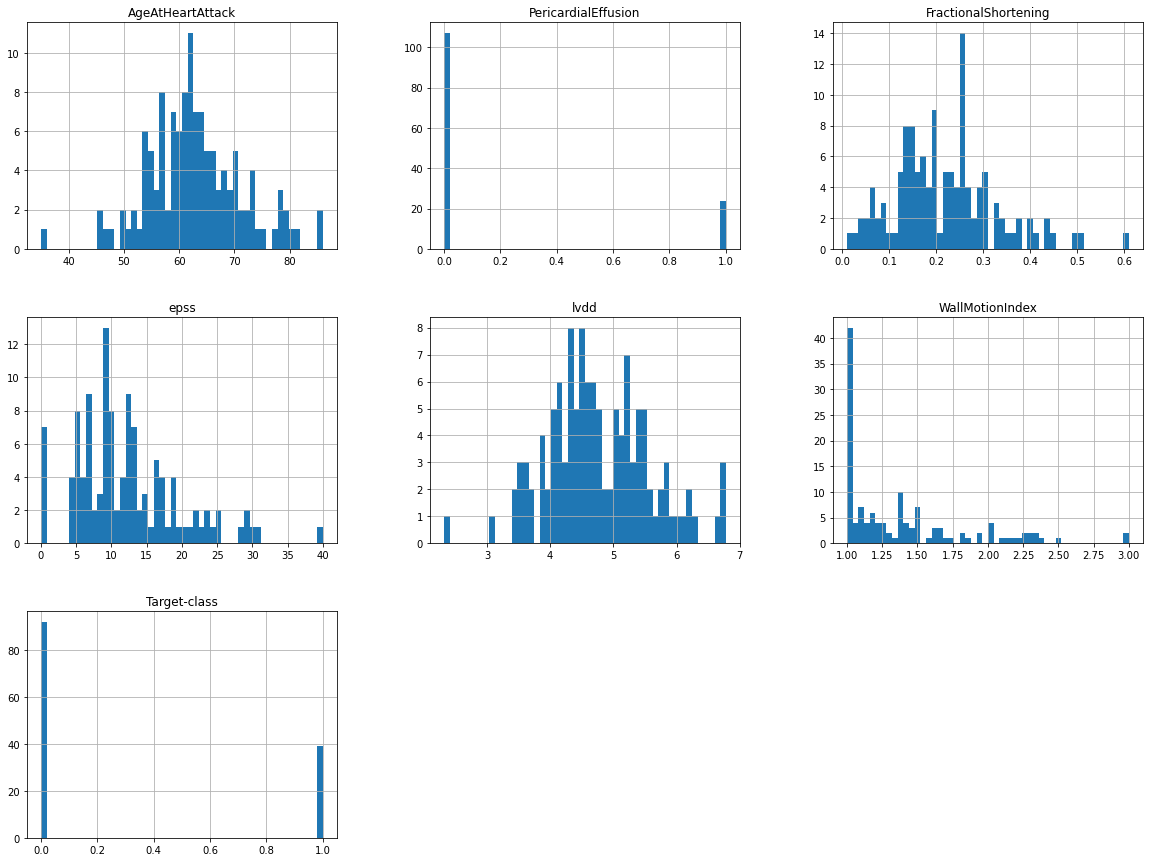

In [24]:
# Plot histograms of all features to visualise their distributions and identify outliers
df.hist(bins=50,figsize=(20,15))

**Comment:**
Comparing with the  features description, I find some quality issues around them:
1. Here is 126 filled one in 131 entities, missing data found in 'AgeAtHeartAttack', and there is 1 outliers around 20 which is abnormal and might be outlier.
2. Here is 124 filled one in 131 entities,missing data found in 'FractionalShortening'
3. Here is 117 filled one in 131 entities,missing data found in 'Epss'. And we can find that the distribution of 'Epss' is not normal: most of the data are around 0-30, but there is 1 data  with 'Epss' around 40 which might be outliers.
4. Here is 121 filled one in 131 entities,missing data found in 'lvdd'.
5. Here is 130 filled one in 131 entities,missing data found in 'WallMotionIndex'.And there are 2 outliers around 3.

In [25]:
# deal with outliers
# Remove outliers in 'AgeAtHeartAttack' column
df_removed_outlier = df.loc[(df['AgeAtHeartAttack'] >= 40) | (df['AgeAtHeartAttack'].isnull())]
df_removed_outlier=df_removed_outlier.loc[(df_removed_outlier['epss'] <=35) | (df_removed_outlier['epss'].isnull())]
df_removed_outlier=df_removed_outlier.loc[(df_removed_outlier['WallMotionIndex'] <= 2.75) | (df_removed_outlier['WallMotionIndex'].isnull())]
# Reset the index of df_removed_outlier
df_removed_outlier = df_removed_outlier.reset_index(drop=True)
df_removed_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgeAtHeartAttack      123 non-null    float64
 1   PericardialEffusion   127 non-null    int64  
 2   FractionalShortening  121 non-null    float64
 3   epss                  113 non-null    float64
 4   lvdd                  118 non-null    float64
 5   WallMotionIndex       126 non-null    float64
 6   Target-class          127 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 7.1 KB


**Comment:**
After removing outliers, we can find that there are 127 entities left in the dataset. histogram of all features are shown below which is better than before.

array([[<AxesSubplot:title={'center':'AgeAtHeartAttack'}>,
        <AxesSubplot:title={'center':'PericardialEffusion'}>,
        <AxesSubplot:title={'center':'FractionalShortening'}>],
       [<AxesSubplot:title={'center':'epss'}>,
        <AxesSubplot:title={'center':'lvdd'}>,
        <AxesSubplot:title={'center':'WallMotionIndex'}>],
       [<AxesSubplot:title={'center':'Target-class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

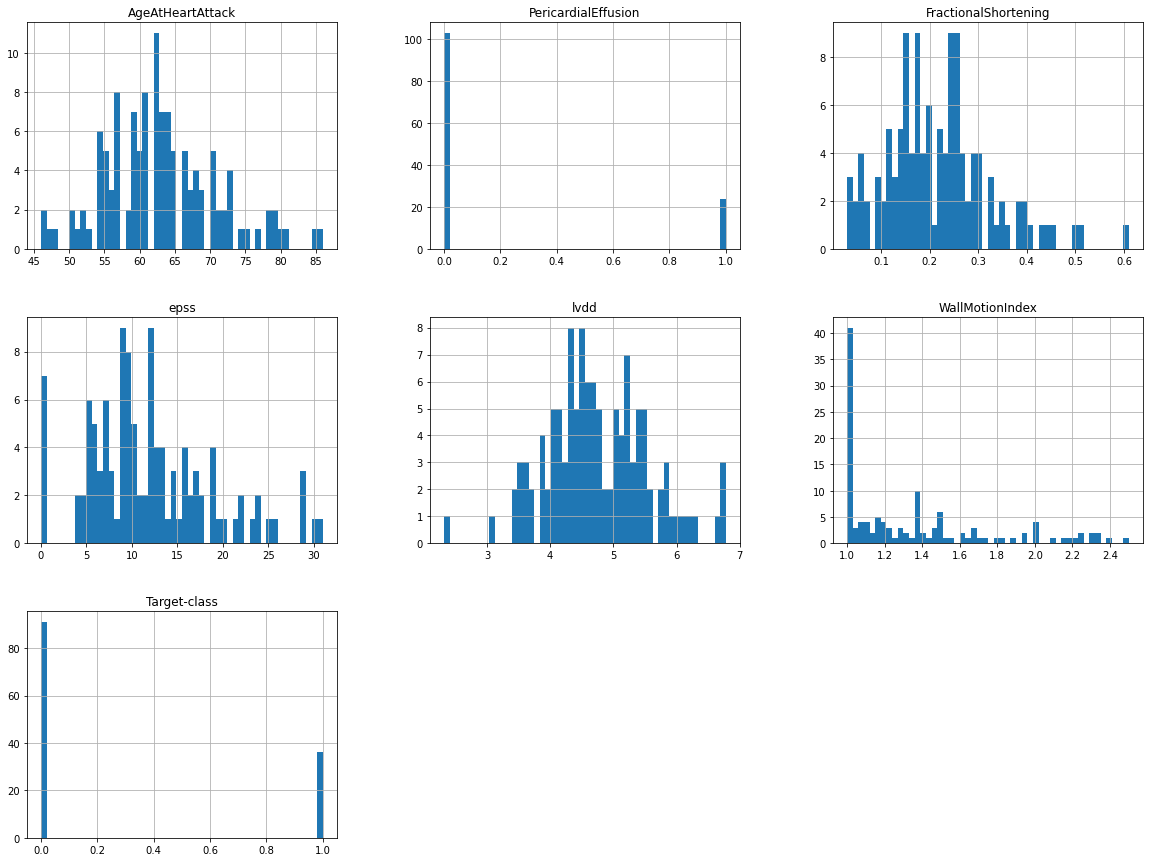

In [26]:
df_removed_outlier.hist(bins=50,figsize=(20,15))

In [27]:
df_removed_outlier.isnull().sum()
# Here still remains some missing data in dataset

AgeAtHeartAttack         4
PericardialEffusion      0
FractionalShortening     6
epss                    14
lvdd                     9
WallMotionIndex          1
Target-class             0
dtype: int64

In [28]:
# Save 'target' column in data_targets
data_targets = df_removed_outlier['Target-class'].copy()

# Save all columns except 'target' in data_features
data_features = df_removed_outlier.drop('Target-class', axis=1)

# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately (3 marks)

In [29]:
# As there is only  numerical attribute that has problems, we can use the median to fill in the missing values, and use the StandardScaler class to scale the data.

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Identify the numerical and categorical columns
num_features=data_features

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

# Apply the ColumnTransformer to the DataFrame
data_features_preprocessing = numerical_transformer.fit_transform(data_features)
data_features_preprocessing = pd.DataFrame(data_features_preprocessing,columns=data_features.columns)
data_features_preprocessing.head()

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,1.039814,-0.482711,0.415285,-0.416301,-0.183231,-0.872616
1,1.168340,-0.482711,1.569149,-0.878887,-0.831718,0.853395
2,-1.016597,-0.482711,0.415285,-1.187278,-1.713660,-0.872616
3,-0.373968,-0.482711,0.347976,0.055845,-0.179340,0.236963
4,-0.759545,-0.482711,-0.546268,1.588240,1.308289,2.209548


# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. (14 marks)

In [30]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_features_preprocessing, data_targets, test_size=0.2, random_state=10)

In [31]:
from sklearn.linear_model import LogisticRegression

# Define logistic regression classifiers
logreg_no_regularization = LogisticRegression(penalty='none', solver='lbfgs')
logreg_l1_regularization = LogisticRegression(penalty='l1', solver='liblinear')
logreg_l2_regularization = LogisticRegression(penalty='l2', solver='lbfgs')

# Fit the logistic regression classifiers
logreg_no_regularization.fit(X_train, y_train)
logreg_l1_regularization.fit(X_train, y_train)
logreg_l2_regularization.fit(X_train, y_train)

LogisticRegression()

In [32]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for logistic regression classifiers
cv_scores_no_regularization = cross_val_score(logreg_no_regularization, X_test, y_test, cv=5)
cv_scores_l1_regularization = cross_val_score(logreg_l1_regularization, X_test, y_test, cv=5)
cv_scores_l2_regularization = cross_val_score(logreg_l2_regularization, X_test, y_test, cv=5)

# Print the cross-validation scores
# print("Logistic Regression (No Regularization) Cross-Validation Scores:", cv_scores_no_regularization)
print("Average Accuracy (No Regularization):", cv_scores_no_regularization.mean())
# print("Logistic Regression (L1 Regularization) Cross-Validation Scores:", cv_scores_l1_regularization)
print("Average Accuracy (L1 Regularization):", cv_scores_l1_regularization.mean())
# print("Logistic Regression (L2 Regularization) Cross-Validation Scores:", cv_scores_l2_regularization)
print("Average Accuracy (L2 Regularization):", cv_scores_l2_regularization.mean())

Average Accuracy (No Regularization): 0.7
Average Accuracy (L1 Regularization): 0.7000000000000001
Average Accuracy (L2 Regularization): 0.74


**Comment:**
From the result above, we can find that the accuracy of logistic regression with L2 regularization is the highest . So we can say that the best performing classifier is logistic regression is with L2 regularization.

# **Exercise 10**

Train a Random Forest classifier using the provided data and quantitatively evaluate and compare the Random Forest classifier  with the best logistic regression classifier identified from Exercise 9. Report which model provides the best results. Next, report the top five most important/relevant features identified using the Random Forest model. (10 marks)

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train)


RandomForestClassifier()

In [34]:
from sklearn.metrics import accuracy_score
# Perform cross-validation for the Random Forest model
cv_scores = cross_val_score(Random_Forest, X_test, y_test, cv=5)

# Print the performance metrics
print("Random Forest Classifier:")
print("Accuracy:", cv_scores.mean())

print("Logistic Regression (L2 Regularization):")
print("Accuracy:", cv_scores_l2_regularization.mean())

Random Forest Classifier:
Accuracy: 0.66
Logistic Regression (L2 Regularization):
Accuracy: 0.74


**Comment:**
From the result above, we compare the cross validation accuracy of Random Forest classifier and logistic regression with L2 regularization.
We can find that the accuracy of logistic regression with L2 regularization is higher than Random Forest classifier. So we can say that logistic regression with L2 regularization provides the best results on the dataset.

In [35]:
# report the top five most important/relevant features identified using the Random Forest model.
importances = pd.Series(Random_Forest.feature_importances_, index=data_features_preprocessing.columns).abs()
sorted_importances = importances.sort_values(ascending=False)

print('The top five most important/relevant features for the provided data set and regression task identified using the Random Forest model are:\n',sorted_importances[:5])

The top five most important/relevant features for the provided data set and regression task identified using the Random Forest model are:
 WallMotionIndex         0.232149
FractionalShortening    0.197124
AgeAtHeartAttack        0.190487
lvdd                    0.188465
epss                    0.158428
dtype: float64
